# Pemodelan ARCH/GARCH
Dalam banyak data finansial (misalnya harga saham), fluktuasi besar sering diikuti oleh fluktuasi besar lainnya, dan fluktuasi kecil oleh fluktuasi kecil. Ini disebut volatility clustering.

Model **ARIMA** hanya mengakomodasi rata-rata bersyarat, namun **tidak bisa menangkap varians bersyarat yang berubah-ubah** (heteroskedastik). Oleh karena itu, diperkenalkanlah:

* ARCH (Autoregressive Conditional Heteroskedasticity) oleh Engle (1982).

* GARCH (Generalized ARCH) oleh Bollerslev (1986).

Contoh Data simulasi menggunakan model **GARCH(1,1)**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeDate’, ‘timeSeries’, ‘fastICA’, ‘cvar’


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



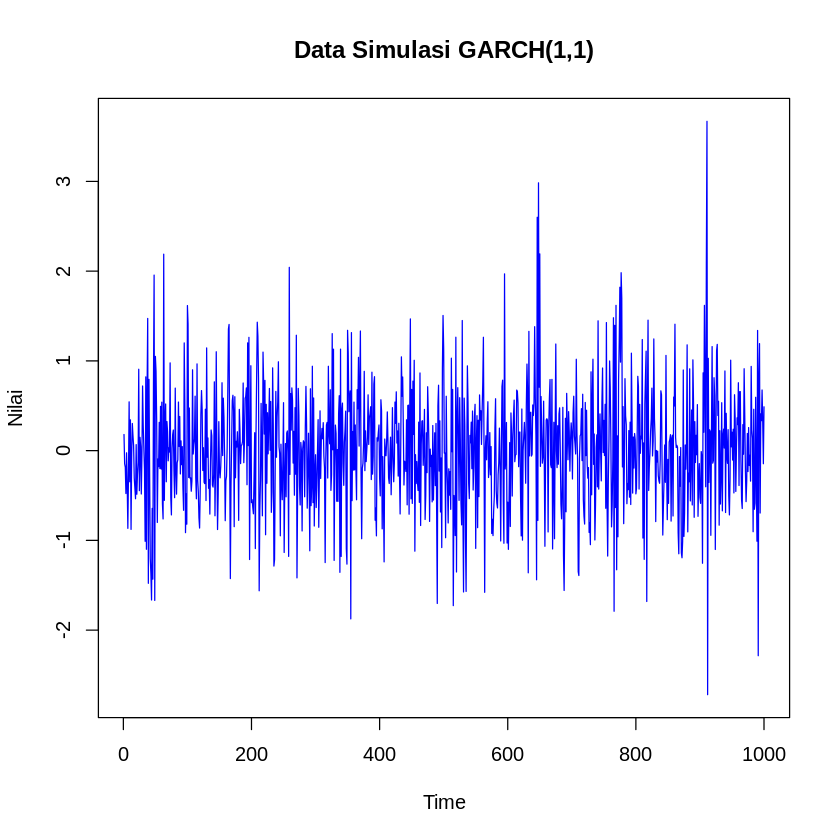

In [ ]:
set.seed(123)
install.packages("fGarch")
library(fGarch)

# Simulasi 1000 data GARCH(1,1)
garch_sim <- garchSim(spec = garchSpec(model = list(omega=0.1, alpha=0.3, beta=0.5)), n = 1000)

# Plot data simulasi
ts.plot(garch_sim, main = "Data Simulasi GARCH(1,1)", ylab = "Nilai", col = "blue")


In [ ]:
install.packages("FinTS")
library(FinTS)

# Uji ARCH pada data simulasi
ArchTest(garch_sim, lags = 5)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  garch_sim
Chi-squared = 122.58, df = 5, p-value < 2.2e-16


Terlihat nilai p-value kecil (< 0.05), maka terdapat heteroskedastisitas, sehingga model ARCH/GARCH digunakan.

In [ ]:
install.packages("rugarch")
library(rugarch)

# Spesifikasi model GARCH(1,1)
spec_garch <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
                         mean.model = list(armaOrder = c(0,0), include.mean = TRUE),
                         distribution.model = "norm")

# Estimasi model
fit_garch <- ugarchfit(spec = spec_garch, data = garch_sim)
show(fit_garch)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘chron’, ‘SkewHyperbolic’, ‘fracdiff’, ‘nloptr’, ‘RcppArmadillo’


Loading required package: parallel


Attaching package: ‘rugarch’


The following object is masked from ‘package:stats’:

    sigma





*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006854    0.018300  0.37451 0.708025
omega   0.152493    0.028264  5.39520 0.000000
alpha1  0.301490    0.050161  6.01042 0.000000
beta1   0.376586    0.078790  4.77962 0.000002

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006854    0.016881  0.40601  0.68474
omega   0.152493    0.022859  6.67100  0.00000
alpha1  0.301490    0.039677  7.59866  0.00000
beta1   0.376586    0.059213  6.35984  0.00000

LogLikelihood : -984.9273 

Information Criteria
------------------------------------
                   
Akaike       1.9779
Bayes        1.9975
Shibata      1.9778
Hannan-Quinn 1.9853

Weighted


please wait...calculating quantiles...


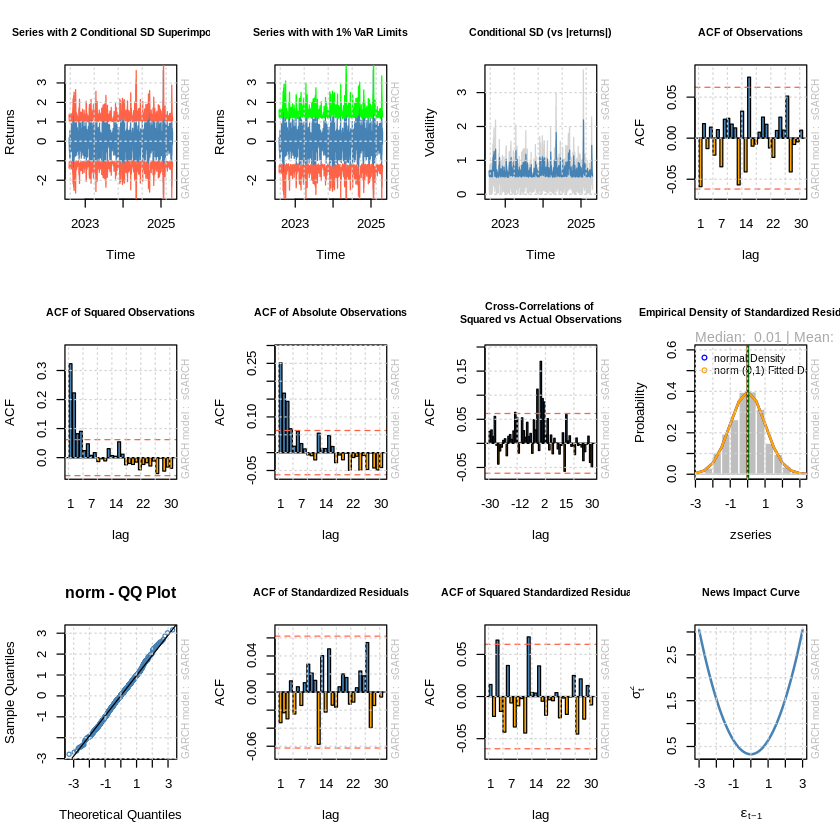

In [ ]:
# Diagnostik residual
plot(fit_garch, which = "all")


# Analisis Empiris ARCH/GARCH: Studi Kasus Saham TLKM

In [ ]:
# Install jika belum ada
install.packages(c("quantmod", "rugarch", "FinTS", "PerformanceAnalytics"))

# Panggil library
library(quantmod)
library(rugarch)
library(FinTS)
library(PerformanceAnalytics)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’


Loading required package: xts

Loading required package: TTR


Attaching package: ‘TTR’


The following object is masked from ‘package:fGarch’:

    volatility


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following objects are masked from ‘package:fGarch’:

    ES, VaR


The following object is masked from ‘package:graphics’:

    legend




[1] "TLKM.JK"

           TLKM.JK.Open TLKM.JK.High TLKM.JK.Low TLKM.JK.Close TLKM.JK.Volume
2020-04-27         3120         3200        3100          3150       85475400
2020-04-28         3170         3200        3140          3160       80212700
2020-04-29         3200         3390        3100          3350      154902100
2020-04-30         3400         3540        3350          3500      163170100
2020-05-04         3400         3400        3260          3320      108988600
2020-05-05         3320         3390        3320          3320       74036700
           TLKM.JK.Adjusted
2020-04-27         2489.530
2020-04-28         2497.433
2020-04-29         2647.595
2020-04-30         2766.144
2020-05-04         2623.885
2020-05-05         2623.885

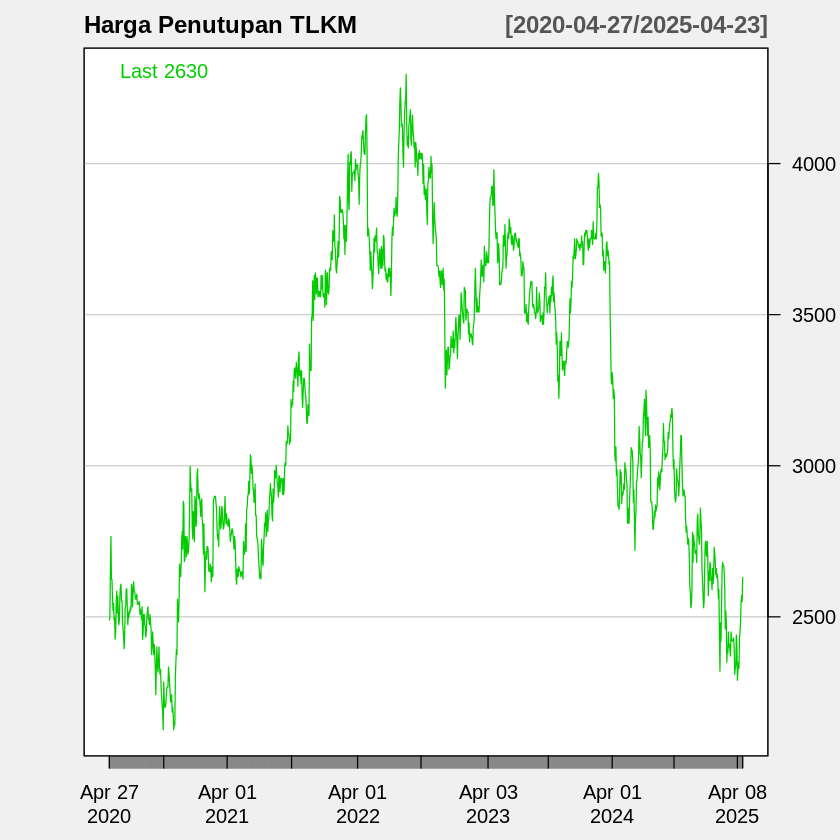

In [ ]:
# Unduh data TLKM dari Yahoo Finance (5 tahun terakhir)
getSymbols("TLKM.JK", from = Sys.Date() - 5*365, src = "yahoo")

# Lihat struktur data
head(TLKM.JK)

# Ambil harga penutupan (adjusted close)
harga <- Ad(TLKM.JK)

# Plot harga penutupan
chartSeries(harga, name = "Harga Penutupan TLKM", theme = chartTheme("white"))


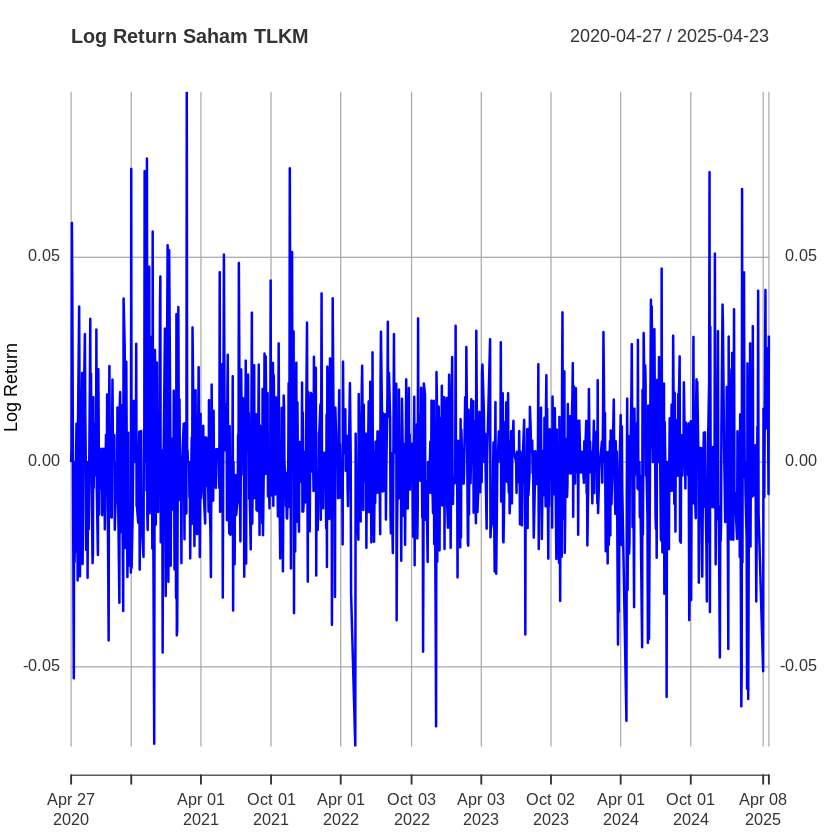

In [ ]:
# Hitung log return harian
ret <- dailyReturn(harga, type = "log")

# Plot
plot(ret_clean, main = "Log Return Saham TLKM", col = "blue", ylab = "Log Return")




In [ ]:
# Uji ARCH pada return
ArchTest(ret, lags = 5)

# Jika p-value < 0.05, ada efek ARCH -> lanjut ke pemodelan GARCH



	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ret
Chi-squared = 29.902, df = 5, p-value = 1.542e-05


In [ ]:
# Spesifikasi model GARCH(1,1)
spec <- ugarchspec(
  variance.model = list(model = "sGARCH", garchOrder = c(1,1)),
  mean.model = list(armaOrder = c(1,0)),  # AR(1) + GARCH(1,1)
  distribution.model = "norm"
)

# Estimasi model
fit <- ugarchfit(spec = spec, data = ret)
show(fit)



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000182    0.000449   0.40602 0.684731
ar1    -0.073343    0.029656  -2.47315 0.013393
omega   0.000004    0.000006   0.75009 0.453199
alpha1  0.035137    0.003112  11.29039 0.000000
beta1   0.951931    0.003374 282.16893 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000182    0.000423  0.430631 0.666737
ar1    -0.073343    0.038523 -1.903894 0.056924
omega   0.000004    0.000045  0.096029 0.923497
alpha1  0.035137    0.046272  0.759351 0.447643
beta1   0.951931    0.061170 15.562095 0.000000

LogLikelihood : 3152.218 

Information Criteria
------------------------------------
    


please wait...calculating quantiles...


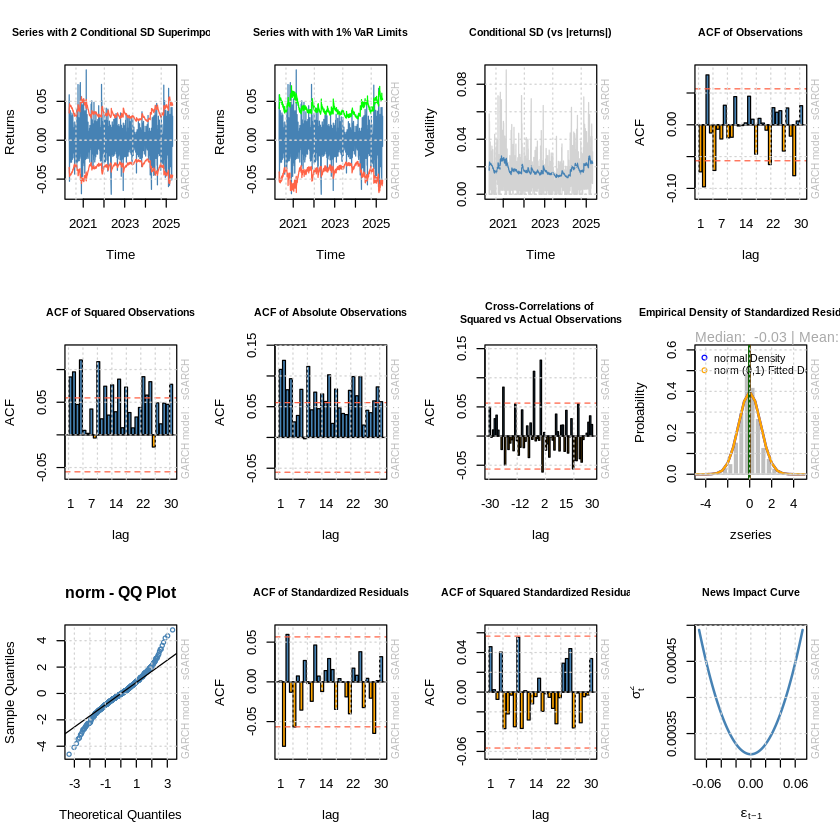

In [ ]:
# Plot hasil estimasi
plot(fit, which = "all")


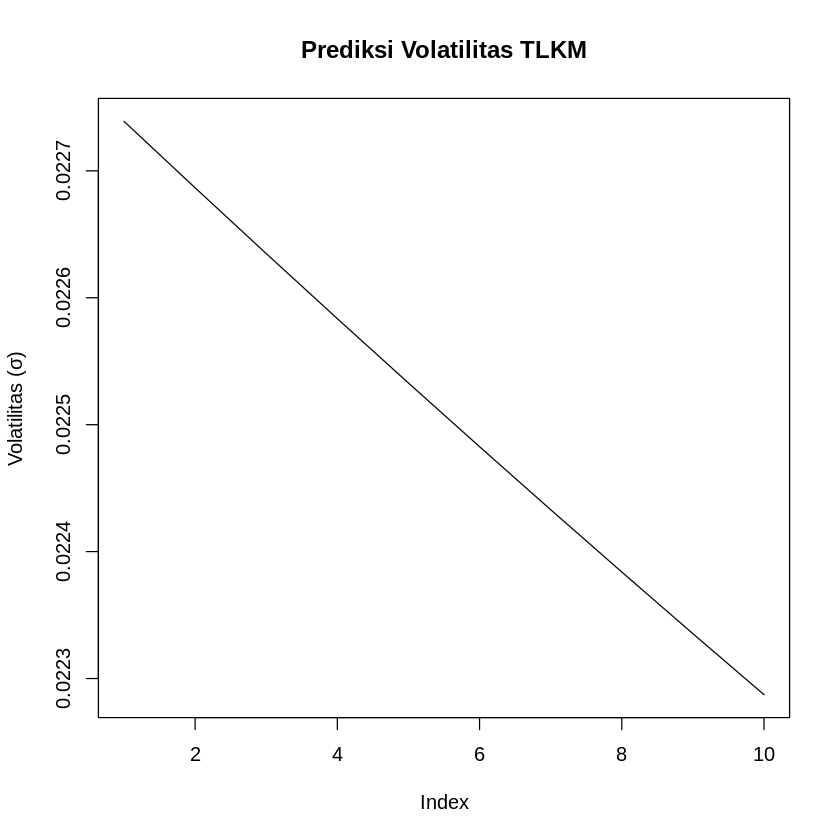

In [ ]:
# Prediksi 10 hari ke depan
forecast <- ugarchforecast(fit, n.ahead = 10)

# Plot volatilitas yang diprediksi
sigma_forecast <- sigma(forecast)
plot(sigma_forecast, type = "l", main = "Prediksi Volatilitas TLKM", ylab = "Volatilitas (σ)")
